In [1]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluar linealidad de las relaciones entre las variables
# y la distribución de las variables
# ------------------------------------------------------------------------------
#import scipy.stats as stats
import scipy.stats as stats
from scipy.stats import shapiro, kstest

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames 

#para desplegar todos los decimales y no tener el formato científico:
#👀 OJO! estar atenta cuando lo pones que no estás perdiendo información
pd.options.display.float_format = '{:.2f}'.format 

# Gestión de los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("files/EmergencyEvents.csv", sep=";")

df.head()

,Year,Country,ISO,Disaster Group,Disaster Subroup,Disaster Type,Disaster Subtype,Total Events,Total Affected,Total Deaths,"Total Damage (USD, original)","Total Damage (USD, adjusted)",CPI
0,1900,Cabo Verde,CPV,Natural,Climatological,Drought,Drought,1,NaN,11000.00,NaN,NaN,"2,8490844088613"
1,1900,India,IND,Natural,Climatological,Drought,Drought,1,NaN,1250000.00,NaN,NaN,"2,8490844088613"
2,1900,Jamaica,JAM,Natural,Hydrological,Flood,NaN,1,NaN,300.00,NaN,NaN,"2,8490844088613"
3,1900,Japan,JPN,Natural,Geophysical,Volcanic activity,Ash fall,1,NaN,30.00,NaN,NaN,"2,8490844088613"
4,1900,Turkey,TUR,Natural,Geophysical,Earthquake,Ground movement,1,NaN,140.00,NaN,NaN,"2,8490844088613"


In [3]:
df.columns

Index(['Year', 'Country', 'ISO', 'Disaster Group', 'Disaster Subroup',
       'Disaster Type', 'Disaster Subtype', 'Total Events', 'Total Affected',
       'Total Deaths', 'Total Damage (USD, original)',
       'Total Damage (USD, adjusted)', 'CPI'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10431 entries, 0 to 10430
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Year                          10431 non-null  int64  
 1   Country                       10431 non-null  object 
 2   ISO                           10431 non-null  object 
 3   Disaster Group                10431 non-null  object 
 4   Disaster Subroup              10431 non-null  object 
 5   Disaster Type                 10431 non-null  object 
 6   Disaster Subtype              8298 non-null   object 
 7   Total Events                  10431 non-null  int64  
 8   Total Affected                7586 non-null   float64
 9   Total Deaths                  7375 non-null   float64
 10  Total Damage (USD, original)  3834 non-null   float64
 11  Total Damage (USD, adjusted)  3830 non-null   float64
 12  CPI                           10380 non-null  object 
dtypes

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,10431.00,1995.61,22.00,1900.00,1986.00,2001.00,2011.00,2023.00
Total Events,10431.00,1.45,1.25,1.00,1.00,1.00,1.00,20.00
Total Affected,7586.00,1125969.20,9760890.89,1.00,1200.00,11414.00,119304.50,330000000.00
Total Deaths,7375.00,3107.71,72555.89,1.00,6.00,23.00,90.00,3700000.00
"Total Damage (USD, original)",3834.00,1122262373.76,6792338544.37,2000.00,10000000.00,68000000.00,400000000.00,210000000000.00
"Total Damage (USD, adjusted)",3830.00,1748703907.12,9115318775.46,2469.00,20209265.50,146924694.00,784776702.00,273218372541.00


In [6]:

df.duplicated().sum()

np.int64(0)

In [7]:
df.shape

(10431, 13)

In [8]:
df.nunique()

Year                             124
Country                          225
ISO                              225
Disaster Group                     1
Disaster Subroup                   5
Disaster Type                     13
Disaster Subtype                  25
Total Events                      19
Total Affected                  4043
Total Deaths                     815
Total Damage (USD, original)    1484
Total Damage (USD, adjusted)    3212
CPI                              114
dtype: int64

In [9]:
# Nulos

df.isna().sum() / df.shape[0] *100

Year                            0.00
Country                         0.00
ISO                             0.00
Disaster Group                  0.00
Disaster Subroup                0.00
Disaster Type                   0.00
Disaster Subtype               20.45
Total Events                    0.00
Total Affected                 27.27
Total Deaths                   29.30
Total Damage (USD, original)   63.24
Total Damage (USD, adjusted)   63.28
CPI                             0.49
dtype: float64

In [10]:
df["Total Damage (USD, original)"]

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
10426   NaN
10427   NaN
10428   NaN
10429   NaN
10430   NaN
Name: Total Damage (USD, original), Length: 10431, dtype: float64

In [11]:
(df.isna().sum() / len(df) * 100).sort_values(ascending=False)


Total Damage (USD, adjusted)   63.28
Total Damage (USD, original)   63.24
Total Deaths                   29.30
Total Affected                 27.27
Disaster Subtype               20.45
CPI                             0.49
Year                            0.00
Country                         0.00
ISO                             0.00
Disaster Group                  0.00
Disaster Subroup                0.00
Disaster Type                   0.00
Total Events                    0.00
dtype: float64

In [12]:
df.sample(10)

,Year,Country,ISO,Disaster Group,Disaster Subroup,Disaster Type,Disaster Subtype,Total Events,Total Affected,Total Deaths,"Total Damage (USD, original)","Total Damage (USD, adjusted)",CPI
4789,1999,Moldova (the Republic of),MDA,Natural,Hydrological,Flood,NaN,1,1713.00,NaN,4000000.00,7027581.00,"56,9185870408555"
3369,1991,Thailand,THA,Natural,Climatological,Drought,Drought,1,2500000.00,NaN,NaN,NaN,"46,5366206057622"
8743,2016,Angola,AGO,Natural,Hydrological,Flood,NaN,1,1544.00,30.00,NaN,NaN,"82,010330903136"
1660,1978,Argentina,ARG,Natural,Hydrological,Flood,NaN,1,1600.00,NaN,NaN,NaN,"22,2901950366959"
3104,1990,China,CHN,Natural,Geophysical,Earthquake,Ground movement,2,64335.00,127.00,58350000.00,130695158.00,"44,6458774383636"
2515,1985,Yugoslavia,YUG,Natural,Climatological,Wildfire,Forest fire,1,NaN,NaN,NaN,NaN,"36,7554679439105"
3206,1990,Sudan (the),SDN,Natural,Geophysical,Earthquake,Ground movement,1,8000.00,NaN,NaN,NaN,"44,6458774383636"
6490,2005,Viet Nam,VNM,Natural,Climatological,Drought,Drought,1,410000.00,NaN,42120000.00,63119035.00,"66,7310579862028"
2356,1984,Netherlands (the),NLD,Natural,Meteorological,Storm,Convective storm,1,NaN,NaN,NaN,NaN,"35,4968811298231"
9468,2019,Ecuador,ECU,Natural,Geophysical,Earthquake,Ground movement,2,264.00,NaN,NaN,NaN,"87,3580067738847"


# Daños declarados por tipo de desastre:

In [13]:
# Comprobamos que porcentaje de nulos hay por tipo de desastre.

df['Disaster Type'].value_counts()  # cuantos enventos hay de cada tipo de desastre en total 

Disaster Type
Flood                    3837
Storm                    2761
Earthquake               1087
Drought                   784
Landslide                 652
Extreme temperature       565
Wildfire                  374
Volcanic activity         231
Insect infestation         92
Mass movement (dry)        44
Glacial lake outburst       2
Fog                         1
Animal accident             1
Name: count, dtype: int64

In [14]:
df[df['Total Damage (USD, adjusted)'].isna()]['Disaster Type'].value_counts() 
# filtro solo los eventos donde Total Damage es nulo y luego cuenta que tipo de desastres son.



Disaster Type
Flood                    2380
Storm                    1431
Earthquake                601
Drought                   568
Landslide                 568
Extreme temperature       498
Wildfire                  235
Volcanic activity         188
Insect infestation         88
Mass movement (dry)        41
Fog                         1
Animal accident             1
Glacial lake outburst       1
Name: count, dtype: int64

In [16]:
# Total de eventos por tipo de desastre
total_eventos = df['Disaster Type'].value_counts()

# Total de eventos SIN damage reportado (nulos)
eventos_nulos = df[df['Total Damage (USD, adjusted)'].isna()]['Disaster Type'].value_counts()

# Unimos ambos resultados en un solo DataFrame
comparativa = pd.DataFrame({
    'Total Eventos': total_eventos,
    'Eventos sin Damage': eventos_nulos
})

# Rellenamos los NaN con 0 (porque puede haber tipos sin nulos)
comparativa = comparativa.fillna(0)

# Calculamos el % de nulos sobre el total
comparativa['% Nulos'] = (comparativa['Eventos sin Damage'] / comparativa['Total Eventos'] * 100).round(2)

# Ordenamos para que veas primero los peores casos
comparativa = comparativa.sort_values('% Nulos', ascending=False)

comparativa


,Total Eventos,Eventos sin Damage,% Nulos
Disaster Type,,,
Animal accident,1,1,100.00
Fog,1,1,100.00
Insect infestation,92,88,95.65
Mass movement (dry),44,41,93.18
Extreme temperature,565,498,88.14
Landslide,652,568,87.12
Volcanic activity,231,188,81.39
Drought,784,568,72.45
Wildfire,374,235,62.83


# Daños declarados por paises: Quizá algunos países no reportan bien los daños económicos.

In [17]:
# Numero de paises unicos sin contar repetidos.

df['Country'].nunique()


225

In [18]:
# Para ver la lista de paises.

df['Country'].unique()


array(['Cabo Verde', 'India', 'Jamaica', 'Japan', 'Turkey',
       'United States of America (the)', 'China', 'Guatemala', 'Myanmar',
       'Martinique', 'Soviet Union', 'Saint Vincent and the Grenadines',
       'Canada', 'Comoros (the)', 'Iran (Islamic Republic of)', 'Israel',
       'Niger (the)', 'Bangladesh', 'Greece',
       'Taiwan (Province of China)', 'Albania', 'Italy',
       'Philippines (the)', 'Belgium', 'Chile', 'Colombia', 'Hong Kong',
       'Romania', 'France', 'Haiti', 'Morocco', 'Pakistan', 'Portugal',
       'Burkina Faso', 'Costa Rica', 'Algeria', 'Gambia (the)',
       'Guinea-Bissau', 'Mali', 'Mauritania', 'Senegal', 'Chad',
       'Kazakhstan', 'Mexico', 'Indonesia', 'Peru', 'Tokelau',
       'Puerto Rico', 'Anguilla', 'Argentina', 'Germany Fed Rep',
       'Ecuador', 'Bahamas (the)', 'Cuba', 'Egypt', 'Jordan', 'Bulgaria',
       'Guadeloupe', 'Saint Kitts and Nevis', 'Montserrat', 'Poland',
       'New Zealand', 'Dominica', 'Dominican Republic (the)', 'Nicara

In [19]:
# ¿cuáles son los países donde más eventos se quedan sin el dato de daño económico?

df[df['Total Damage (USD, adjusted)'].isna()]['Country'].value_counts().head(10)

# df['Total Damage (USD, adjusted)'].isna() -> Filtra las filas donde el campo de daños económicos ajustados es NaN (o sea, está vacío).
# Luego ['Country'] -> Dentro de esas filas nulas, seleccionas la columna Country.
# .value_counts() -> Cuenta cuántas veces aparece cada país en esas filas donde faltan los daños.

Country
India                             233
Bangladesh                        180
Indonesia                         173
China                             173
Japan                             151
Pakistan                          134
Peru                              120
Philippines (the)                 119
United States of America (the)    113
Colombia                          111
Name: count, dtype: int64

In [20]:
# cuántos eventos hay en total por país, sin importar si tienen o no daño reportado.

df['Country'].value_counts().head(10)


Country
United States of America (the)    405
China                             385
India                             362
Indonesia                         274
Philippines (the)                 271
Japan                             258
Bangladesh                        231
Mexico                            195
Pakistan                          175
Peru                              156
Name: count, dtype: int64

In [21]:
# Total de eventos por país
total_eventos_pais = df['Country'].value_counts()

# Total de eventos con damage nulo por país
eventos_nulos_pais = df[df['Total Damage (USD, adjusted)'].isna()]['Country'].value_counts()

# Unimos los dos resultados en un DataFrame
comparativa_paises = pd.DataFrame({
    'Total Eventos': total_eventos_pais,
    'Eventos sin Damage': eventos_nulos_pais
})

# Rellenamos los NaN con 0 (países que no tienen eventos nulos)
comparativa_paises = comparativa_paises.fillna(0)

# Calculamos el % de nulos
comparativa_paises['% Nulos'] = (comparativa_paises['Eventos sin Damage'] / comparativa_paises['Total Eventos'] * 100).round(2)

# Ordenamos para ver los peores primero
comparativa_paises = comparativa_paises.sort_values('% Nulos', ascending=False)

comparativa_paises.head(10)


,Total Eventos,Eventos sin Damage,% Nulos
Country,,,
United Arab Emirates (the),1,1.00,100.00
Sao Tome and Principe,2,2.00,100.00
Mali,41,41.00,100.00
French Guiana,3,3.00,100.00
Guinea-Bissau,17,17.00,100.00
Serbia Montenegro,12,12.00,100.00
Saint Barthélemy,1,1.00,100.00
Isle of Man,1,1.00,100.00
"Saint Helena, Ascension and Tristan da Cunha",1,1.00,100.00


In [22]:
# Filtrar para ver solo los países con eventos sin damage reportado:
solo_nulos = comparativa_paises[comparativa_paises['Eventos sin Damage'] > 0]
solo_nulos


,Total Eventos,Eventos sin Damage,% Nulos
Country,,,
United Arab Emirates (the),1,1.00,100.00
Sao Tome and Principe,2,2.00,100.00
Mali,41,41.00,100.00
French Guiana,3,3.00,100.00
Guinea-Bissau,17,17.00,100.00
...,...,...,...
Samoa,15,5.00,33.33
United States of America (the),405,113.00,27.90
Australia,152,40.00,26.32


In [23]:
# para verlos ordenados por el % de nulos de mayor a menor.

solo_nulos = solo_nulos.sort_values('% Nulos', ascending=False)
solo_nulos


,Total Eventos,Eventos sin Damage,% Nulos
Country,,,
United Arab Emirates (the),1,1.00,100.00
Montenegro,5,5.00,100.00
Kuwait,2,2.00,100.00
"Palestine, State of",8,8.00,100.00
Gabon,4,4.00,100.00
...,...,...,...
Samoa,15,5.00,33.33
United States of America (the),405,113.00,27.90
Australia,152,40.00,26.32


In [24]:
# Para ver solo los que tienen el 100% de nulos (nunca reportan damage)
solo_100_nulos = comparativa_paises[comparativa_paises['% Nulos'] == 100]
solo_100_nulos


,Total Eventos,Eventos sin Damage,% Nulos
Country,,,
United Arab Emirates (the),1,1.00,100.00
Sao Tome and Principe,2,2.00,100.00
Mali,41,41.00,100.00
French Guiana,3,3.00,100.00
Guinea-Bissau,17,17.00,100.00
Serbia Montenegro,12,12.00,100.00
Saint Barthélemy,1,1.00,100.00
Isle of Man,1,1.00,100.00
"Saint Helena, Ascension and Tristan da Cunha",1,1.00,100.00



# Nulos por paises:

Hay 225 países en total.
21 países (≈ 9%) nunca reportan daños económicos (100% nulos en esos países).
El resto de países sí reportan en algunos casos, pero no siempre (hay desastres con y sin dato económico).
En total, la columna de Total Damage (USD, adjusted) tiene más del 60% de nulos.

# ¿Qué significan estos nulos?

1. No son aleatorios: Dependen del tipo de desastre y del país.
2. Hay problemas de calidad del dato / disponibilidad de información:
    - Algunos países no tienen sistema de reporte económico de daños.
    - Otros pueden tener reportes parciales o desiguales según el evento (por ejemplo, sí reportan daños en terremotos pero no en inundaciones).
3. Puede haber también falta de datos históricos (quizá antes de cierto año no se recogía bien).

# ¿Qué decisiones puedo tomar con estos nulos?

1. Filtrar solo países que sí reportan (descartar los 21 que no reportan nunca)
    Esto mejora la calidad de tu análisis pero reduce el alcance geográfico (pierdes esos países).
2. Mantener todos los países pero analizar solo los eventos con daño reportado (quitar solo las filas con nulo en Total Damage)
    Aquí el riesgo es que desprecias muchos eventos, pero el análisis es consistente.
3. Hacer dos análisis paralelos:
    - Uno sobre el total de eventos (incluyendo nulos) para entender la frecuencia de los desastres.
    - Otro solo sobre los eventos con damage reportado para las conclusiones económicas.


# Conclusiones para el storytelling:

🗯️ "Hemos identificado que la calidad del dato económico en los desastres no es homogénea: más del 60% de los eventos no tienen daños económicos reportados, y 21 países (≈ 9%) nunca aportan esta información. Esto condiciona cualquier análisis global de impacto económico y nos lleva a priorizar el análisis sobre aquellos eventos donde sí se dispone de esta variable, asegurando así la coherencia de los resultados."
🗯️ "La falta de reporte no es aleatoria, sino que depende tanto del país como del tipo de desastre, lo que evidencia desigualdad en los sistemas de documentación y reporte a nivel mundial."


In [25]:
# los que si reportan el 100% y no hay nulos 

paises_sin_nulos = comparativa_paises[comparativa_paises['% Nulos'] == 0]
paises_sin_nulos


,Total Eventos,Eventos sin Damage,% Nulos
Country,,,
Qatar,1,0.00,0.00
Guam,8,0.00,0.00
Virgin Island (British),2,0.00,0.00
Saint Martin (French Part),1,0.00,0.00
Brunei Darussalam,1,0.00,0.00
Sint Maarten (Dutch part),1,0.00,0.00


In [26]:
len(paises_sin_nulos)

6

In [27]:
paises_sin_nulos.index.tolist()


['Qatar',
 'Guam',
 'Virgin Island (British)',
 'Saint Martin (French Part)',
 'Brunei Darussalam',
 'Sint Maarten (Dutch part)']

# ¿Qué significa esto?

- Muy pocos países reportan siempre los daños económicos -> la calidad del dato es baja a nivel global.
- Estos países son probablemente pequeños, con pocos eventos, y tienen capacidad o interés en registrar los daños de forma sistemática.
- Esto confirma que la falta de datos no es aleatoria, sino estructural (hay un sesgo fuerte por país).

# Conclusiones para el storytelling:

🗯️ "Solo 6 de los 225 países analizados presentan el 100% de cobertura en el reporte económico de los daños por desastres naturales. Esto refleja una gran disparidad en la calidad y disponibilidad de la información a nivel internacional, lo que condiciona cualquier análisis global sobre el impacto económico de los desastres."
🗯️ "La mayoría de los países presentan sistemas de reporte parcial o inexistente, lo que genera una importante pérdida de información sobre los costes reales de los desastres a nivel mundial."

# ¿Qué podemos hacer con este dato?

Visualizar estos países con un mapa de colores (ej.: verde = 100% reporte, rojo = 0% reporte).
Mostrar el dato como Big Number o KPI en el dashboard:
→ "🟢 6 países con cobertura del 100%".

# Conclusión sobre la columna de daño económico (Total Damage (USD, adjusted)) por país:

El análisis de los datos económicos sobre el impacto de los desastres naturales revela una importante limitación en la calidad y cobertura de la información. Concretamente:

- Más del 60% de los eventos en el dataset carecen de información sobre los daños económicos ajustados a la inflación.

- La falta de reporte no es aleatoria, sino que depende tanto del tipo de desastre como del país:

        - Algunos desastres, como insect infestations, extreme temperatures o droughts, presentan sistemáticamente altos porcentajes de nulos.
        - En el ámbito geográfico, 21 países (≈ 9% del total) nunca reportan datos económicos (100% de sus eventos sin daño informado).
        - Por el contrario, solo 6 países (≈ 2.7%) muestran cobertura completa (100% de reporte) en esta variable.

Esta disparidad sugiere la existencia de desigualdad en los sistemas de documentación y reporte de los daños económicos a nivel mundial, afectando especialmente a ciertos tipos de desastre y regiones.

Como resultado, cualquier análisis económico basado en esta variable debe realizarse con precaución y transparencia, reconociendo las limitaciones del dato y el sesgo potencial introducido por la falta de información.

👉 Por ello, hemos optado por:
Priorizar el análisis económico únicamente sobre los eventos que disponen del dato reportado, asegurando así la coherencia y calidad del análisis.
Mantener el resto de la información para explorar patrones generales de frecuencia y tipología de los desastres, pero diferenciando claramente entre análisis económicos y análisis de ocurrencia.

# Daños declarados por año: Quizá antes de cierto año no se recogía el daño económico. 

In [32]:
# Cuenta eventos totales por año
total_eventos_anio = df['Year'].value_counts().sort_index()

# Cuenta eventos con 'Total Damage (USD, adjusted)' nulo por año
nulos_por_anio = df[df['Total Damage (USD, adjusted)'].isna()]['Year'].value_counts().sort_index()

# Aquí es donde tenías el error → asegúrate de que usas 'anio' y no 'año'
comparativa_anios = pd.DataFrame({
    'Total Eventos': total_eventos_anio,
    'Eventos sin Damage': nulos_por_anio
}).fillna(0)

# Calcula el porcentaje de nulos
comparativa_anios['% Nulos'] = (comparativa_anios['Eventos sin Damage'] / comparativa_anios['Total Eventos'] * 100).round(2)

# Ordena por % de nulos
comparativa_anios.sort_values('% Nulos', ascending=False)




,Total Eventos,Eventos sin Damage,% Nulos
Year,,,
2023,51,51,100.00
1909,13,13,100.00
1924,6,6,100.00
1921,1,1,100.00
1910,15,15,100.00
...,...,...,...
1969,61,27,44.26
1970,58,24,41.38
1967,57,22,38.60


🎯 Interpretación:
- En ciertos años no se reporta daño económico en absolutamente ningún evento.
- Esto ocurre:
    -> En años recientes como 2023 (lo cual es raro -> puede ser que el dataset esté incompleto o los datos de daños aún no hayan sido actualizados).
    -> En años muy antiguos (1909, 1924, etc.), lo cual tiene sentido: probablemente en esas épocas no existía el sistema de medición o reporte del daño económico

- Si bajas en la tabla -> Vas viendo que a medida que te acercas a los años 60, 70, 80… baja el porcentaje de nulos, pero en muchos sigue habiendo un % alto.

🎯 Conclusión clara de esto:

La falta de reporte de daños económicos tiene una fuerte componente temporal: en los primeros años del registro histórico (principios y mediados del siglo XX) y en los eventos más recientes (2023), el dato de daños ajustados está ausente en casi todos los casos. Esto puede deberse a limitaciones en la recogida histórica del dato, y en el caso de 2023, a la posible falta de actualización del dataset.
Este comportamiento no es aleatorio, sino sistemático según el año, lo que debe tenerse en cuenta al interpretar cualquier análisis económico basado en estos datos.

In [34]:
# filtrar los años con 100% nulos: 

nulos_100 = comparativa_anios[comparativa_anios['% Nulos'] == 100]
nulos_100


,Total Eventos,Eventos sin Damage,% Nulos
Year,,,
1901,1,1,100.00
1904,3,3,100.00
1909,13,13,100.00
1910,15,15,100.00
1916,2,2,100.00
1921,1,1,100.00
1924,6,6,100.00
2023,51,51,100.00


In [35]:
# Para saber hasta que año ocurre esto (el último año con 100% nulos)

ultimo_anio_100 = nulos_100.index.max()
print(f'El último año con 100% de nulos es: {ultimo_anio_100}')


El último año con 100% de nulos es: 2023


In [36]:
# Para ver el rango completo de años con 100% nulos:

primer_anio_100 = nulos_100.index.min()
ultimo_anio_100 = nulos_100.index.max()

print(f'Desde {primer_anio_100} hasta {ultimo_anio_100} hubo un 100% de nulos en el daño económico reportado.')


Desde 1901 hasta 2023 hubo un 100% de nulos en el daño económico reportado.


In [37]:
# Lista de años con 100% nulos.
nulos_100.index.tolist()


[1901, 1904, 1909, 1910, 1916, 1921, 1924, 2023]

In [39]:
# Filtro por rango de 2000 a 2022: 

comparativa_anios.loc[2000:2022]


,Total Eventos,Eventos sin Damage,% Nulos
Year,,,
2000,274,157,57.30
2001,259,164,63.32
2002,295,183,62.03
2003,238,154,64.71
2004,242,159,65.70
2005,292,199,68.15
2006,224,165,73.66
2007,273,179,65.57
2008,220,156,70.91


# ¿Por qué hay tantos valores ausentes en el daño económico reportado?

El alto porcentaje de valores nulos en la variable de daños económicos ajustados a la inflación no es fruto del azar. Existen múltiples factores que explican esta falta de información, relacionados con las limitaciones estructurales y metodológicas en la recogida de datos a nivel global.

🔎 Principales causas identificadas:

1. Falta de capacidad técnica o administrativa:Muchos países, especialmente aquellos con menos recursos, no cuentan con sistemas robustos para evaluar y cuantificar el impacto económico tras un desastre. Las prioridades suelen centrarse en el conteo de víctimas y personas afectadas.

2. Dificultad para medir el daño económico en ciertos tipos de desastre:Algunos eventos, como sequías, olas de calor o epidemias, generan pérdidas indirectas (productividad, salud, migración) más difíciles de calcular que la destrucción física de infraestructuras.

3. Ausencia de metodologías homogéneas:No existe un estándar universal sobre qué debe considerarse como “daño económico” (costes directos, indirectos, pérdidas agrícolas, reconstrucción, etc.). Esto complica el reporte fiable y comparable entre países.

4. Eventos de baja intensidad o localización marginal:Los desastres de menor escala, con daños limitados o localizados, a menudo no reciben una evaluación económica formal, aunque sí se registren en la base de datos.

5. Retrasos en la actualización de los datos:Mientras que las cifras de víctimas y afectados suelen reportarse de forma inmediata, las estimaciones económicas pueden tardar meses o incluso años en completarse. Esto podría explicar la alta ausencia de datos en años recientes como 2019 o 2023.

6. Desinterés político o falta de transparencia:En algunos contextos, los gobiernos pueden optar por no publicar las cifras económicas por cuestiones políticas, reputacionales o administrativas, especialmente cuando el reconocimiento del daño podría tener implicaciones financieras o diplomáticas.

🟠 Implicación para el análisis:

Debido a estas limitaciones, cualquier análisis económico basado en esta variable debe realizarse con precaución y transparencia, reconociendo los posibles sesgos y la desigual cobertura del dato entre países, tipos de desastre y periodos temporales.

# Total Deaths -> 29,30% nulos

In [40]:
# calculo el total de eventos por tipo de desastre (con y sin nulos)

df['Disaster Type'].value_counts()

# Esto da el total de eventos por tipo sin importar si tienen o no dato de muertes.

Disaster Type
Flood                    3837
Storm                    2761
Earthquake               1087
Drought                   784
Landslide                 652
Extreme temperature       565
Wildfire                  374
Volcanic activity         231
Insect infestation         92
Mass movement (dry)        44
Glacial lake outburst       2
Fog                         1
Animal accident             1
Name: count, dtype: int64

In [41]:
# compruebo si los nulos de Total Deaths dependen del tipo de desastre

df[df['Total Deaths'].isna()]['Disaster Type'].value_counts()


# ¿De los eventos SIN dato de muertos, cuántos son de cada tipo de desastre?, por ejemplo -> Significa que de todos los eventos donde no hay información de muertes, 
# 941 son inundaciones, 713 son sequías ...


Disaster Type
Flood                   941
Drought                 713
Storm                   663
Earthquake              183
Wildfire                183
Volcanic activity       145
Extreme temperature     105
Insect infestation       92
Landslide                29
Mass movement (dry)       2
Name: count, dtype: int64

In [42]:
#  calculo qué % de los eventos de cada tipo tienen nulo en Total Deaths

# Total de eventos por tipo
total_eventos_tipo = df['Disaster Type'].value_counts()

# Total de eventos sin dato de muertes por tipo
nulos_deaths_por_tipo = df[df['Total Deaths'].isna()]['Disaster Type'].value_counts()

# Crear el DataFrame comparativo
comparativa_deaths = pd.DataFrame({
    'Total Eventos': total_eventos_tipo,
    'Eventos sin Deaths': nulos_deaths_por_tipo
}).fillna(0)

# Calcular el % de nulos
comparativa_deaths['% Nulos Deaths'] = (comparativa_deaths['Eventos sin Deaths'] / comparativa_deaths['Total Eventos'] * 100).round(2)

# Ordenar para ver los peores casos primero
comparativa_deaths = comparativa_deaths.sort_values('% Nulos Deaths', ascending=False)

comparativa_deaths


,Total Eventos,Eventos sin Deaths,% Nulos Deaths
Disaster Type,,,
Insect infestation,92,92.00,100.00
Drought,784,713.00,90.94
Volcanic activity,231,145.00,62.77
Wildfire,374,183.00,48.93
Flood,3837,941.00,24.52
Storm,2761,663.00,24.01
Extreme temperature,565,105.00,18.58
Earthquake,1087,183.00,16.84
Mass movement (dry),44,2.00,4.55


# ¿Qué conclusiones saco?

- El dato de muertes no está uniformemente reportado en todos los tipos de desastre.
- En algunos desastres (sequías, plagas) la ausencia de datos es estructural, no aleatoria.
- En eventos donde sí suele haber víctimas (inundaciones, tormentas, terremotos), el dato es mejor, pero no perfecto: hay lagunas importantes de información.
- Imputar 0 en ciertos tipos podría estar justificado (ej. infestaciones, si confirmas que nunca hay muertos en ningún caso reportado).
- Para el resto, lo más ético es mantener los nulos y avisar de la limitación en tu análisis.

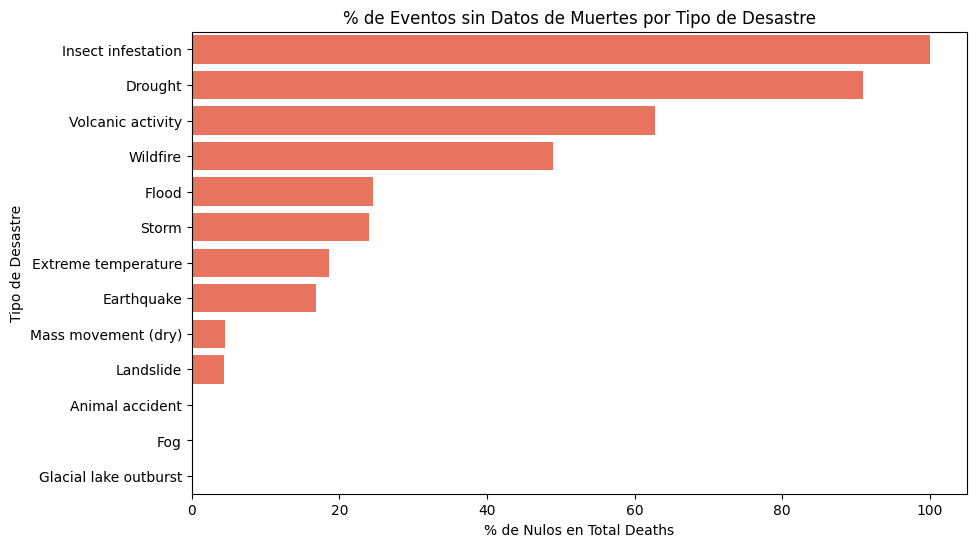

In [43]:

# Defino diccionario con dos listas: 
#   -> una lista de los tipos de desastre (disaster Type)
#   -> otra lista con los porcentajes de nulos que calculo antes (Percent Null Deaths)

data = {
    'Disaster Type': [
        'Insect infestation', 'Drought', 'Volcanic activity', 'Wildfire', 'Flood',
        'Storm', 'Extreme temperature', 'Earthquake', 'Mass movement (dry)',
        'Landslide', 'Animal accident', 'Fog', 'Glacial lake outburst'
    ],
    'Percent Null Deaths': [
        100.00, 90.94, 62.77, 48.93, 24.52, 24.01, 18.58, 16.84, 4.55, 4.45, 0.00, 0.00, 0.00
    ]
}

# Creo el DataFrame con los datos: Esto convierte el diccionario en un DataFrame, donde cada columna es una de las claves del diccionario.

df_deaths_nulls = pd.DataFrame(data)

# Ordeno el DataFrame por porcentaje de nulos de mayor a menor

df_deaths_nulls = df_deaths_nulls.sort_values('Percent Null Deaths', ascending=False)

# Creo el gráfico con seaborn

plt.figure(figsize=(10, 6))
sns.barplot(data=df_deaths_nulls, y='Disaster Type', x='Percent Null Deaths', color='tomato')
plt.xlabel('% de Nulos en Total Deaths')
plt.ylabel('Tipo de Desastre')
plt.title('% de Eventos sin Datos de Muertes por Tipo de Desastre');





# Columna Total Affected -> Nulos 27.27%

In [45]:
# Reviso si los nulos dependen del tipo de desastre:

df[df['Total Affected'].isna()]['Disaster Type'].value_counts()

# Filtra los eventos donde no hay dato de Total Affected y cuenta cuántos eventos de cada tipo de desastre están en esa situación.

# 🎯 Conclusión:
# Los eventos de tipo tormenta, inundación y temperaturas extremas son los que NO se reportan datos de personas afectadas de forma más frecuentemente 


Disaster Type
Storm                    928
Flood                    508
Extreme temperature      390
Drought                  271
Landslide                255
Earthquake               197
Wildfire                 134
Insect infestation        88
Volcanic activity         45
Mass movement (dry)       27
Fog                        1
Glacial lake outburst      1
Name: count, dtype: int64

In [46]:
# ¿Depende del país?: Quizás algunos países no reportan nunca los afectados

df[df['Total Affected'].isna()]['Country'].value_counts().head(10)

# Filtra los eventos sin Total Affected y cuenta cuántos eventos sin ese dato hay por país

#🎯 Conclusión: Algunos de los países con mejor infraestructura (EE. UU., Japón, Francia, España) también tienen muchos eventos sin datos de afectados.
#  Esto sugiere que la ausencia de información no es solo por capacidad técnica, también podría deberse a la prioridad que se da a reportar este dato


Country
United States of America (the)    188
India                             130
China                              81
Japan                              74
France                             68
Mexico                             61
Pakistan                           58
Italy                              55
Canada                             51
Spain                              49
Name: count, dtype: int64

In [47]:
# Cruzar con Total Deaths: Puede ser interesante ver si hay eventos sin dato de afectados pero con muertos, o si en algunos casos faltan los dos.

df[(df['Total Affected'].isna()) & (df['Total Deaths'].notna())].shape[0]
df[(df['Total Affected'].notna()) & (df['Total Deaths'].isna())].shape[0]

# Esto te ayuda a ver si el dato de afectados y muertos están relacionados o si la ausencia es independiente.

# Busco eventos donde NO tiene el dato de afectados, pero SÍ tiene el de muertos.
# .shape[0]  devuelve el número de filas que cumplen esa condición.

#🎯 Conclusión: 
#   -  En 2.077 eventos hay muertos reportados, pero no sabemos cuántas personas estuvieron afectadas.
#   -  Esto es importante, porque no es lo mismo que no hubiera afectados… es que no se reportó el dato, aunque sí reportaron muertes.

2077

# Storytelling sobre la variable Total Affected:

🗣️ Cobertura desigual en el dato de personas afectadas
Aunque el número de personas afectadas es uno de los indicadores clave en la medición del impacto de los desastres, el análisis revela que la calidad de este dato es muy desigual y presenta importantes lagunas.
Un 27,3% de los eventos registrados carecen de información sobre personas afectadas. Este porcentaje es especialmente preocupante porque afecta a desastres de gran escala y no se limita a eventos pequeños o marginales.

🔎 ¿Dónde faltan estos datos?
- Los tipos de desastre con más eventos sin información de afectados son tormentas, inundaciones y temperaturas extremas, donde además es esperable que haya población desplazada o herida.
- Algunos países con gran capacidad técnica como Estados Unidos, India, China o Japón destacan entre los que más eventos registran sin dato de personas afectadas, lo que indica que la ausencia de información no siempre es una cuestión de recursos, sino también de prioridades en el reporte.

⚠️ Inconsistencias entre muertos y afectados
- Encontramos 2.077 eventos en los que se reportan muertes, pero no se informa sobre afectados.
- Esto sugiere que la ausencia de datos sobre afectados no implica que no existan personas damnificadas, sino que simplemente no se recogió la información.
- Esta falta de consistencia entre indicadores básicos refuerza la necesidad de interpretar los datos con precaución.

💡 Conclusión:
La variable Total Affected, fundamental para medir la magnitud social de los desastres, presenta importantes vacíos de información. Estos vacíos no son aleatorios, sino que se concentran en ciertos tipos de desastre y países, e incluso se dan en eventos donde sí se reportan víctimas mortales. Esta situación limita la capacidad de realizar análisis comparativos y subraya la necesidad de mejorar los sistemas de reporte en emergencias a nivel internacional.


# Columna Disaster Subtype -> Nulos 20.45%

Esta columna representa la subcategoría del tipo de desastre.
Ejemplo:
Tipo: Storm -> Subtipo: Hurricane, Tropical Storm, Cyclone, etc.
Tipo: Flood -> Subtipo: Flash flood, River flood, etc.


In [48]:
# ¿Quiénes son los responsables de esos nulos? -> por tipo de desastre:

df[df['Disaster Subtype'].isna()]['Disaster Type'].value_counts()

# 🎯 Conclusión: El problema de los nulos en Disaster Subtype está concentrado sobre todo en inundaciones y tormentas, 
# donde el detalle podría ser importante (ej.: saber si fue una "flash flood", "tropical storm", etc.).


Disaster Type
Flood                    1500
Storm                     526
Landslide                  45
Wildfire                   39
Insect infestation          9
Volcanic activity           9
Glacial lake outburst       2
Fog                         1
Animal accident             1
Drought                     1
Name: count, dtype: int64

In [49]:
# Por País ¿hay paises que nunca reportan subtipo?

df[df['Disaster Subtype'].isna()]['Country'].value_counts().head(10)

# Filtra los eventos sin subtipo y cuenta cuántos eventos sin subtipo hay por país (top 10).

# 🎯Conclusión: Algunos de los países con más desastres son también los que menos desglosan el subtipo.
# Esto confirma que no es solo un problema de países con menos recursos, también es una cuestión de cómo reportan


Country
United States of America (the)    104
India                              76
China                              59
Bangladesh                         57
Japan                              52
Philippines (the)                  52
Brazil                             45
Indonesia                          40
Italy                              38
Pakistan                           38
Name: count, dtype: int64

⭐️ ¿Qué significa esto?

- Algunos tipos nunca tienen subtipo (100%), como:
    1. Accidentes con animales, niebla y desbordamiento de lagos glaciares.
    2. Probablemente no hay subcategorías definidas para estos tipos, o no es habitual reportarlas.
- En otros (como Flood y Storm) hay un porcentaje importante de nulos, aunque sí existen subtipos definidos:
    1. Esto sí es preocupante, porque se pierde información relevante (ej.: ¿qué tipo de inundación fue? ¿qué tipo de tormenta?).
    2. Además, puede limitar tu capacidad de análisis por nivel de severidad o características del evento.
- Algunos tipos, como terremotos, temperaturas extremas y movimientos de masa en seco, reportan siempre el tipo general, pero no necesitan subtipo (0% nulos).

🟢 Resumen:

“El análisis del detalle en la variable Disaster Subtype muestra que, aunque existe un 20,45% de nulos a nivel global, esta falta de especificación se concentra en ciertos tipos de desastre como inundaciones y tormentas, donde el subtipo podría aportar información clave sobre la naturaleza y el comportamiento del evento. En cambio, otros tipos, como terremotos o temperaturas extremas, presentan una cobertura completa o no requieren este nivel de desglose. Esta situación revela diferencias en las metodologías de reporte según tipo de desastre y país, lo que debe tenerse en cuenta a la hora de realizar análisis más detallados.”

# Columna CPI: Nulos 0.49%

- ¿Qué es el CPI y para qué sirve aquí?

El CPI se usa para ajustar los daños económicos a inflación.
Esto permite que las cifras de daños en dólares (por ejemplo, de 1980 y de 2020) sean comparables en términos reales.
Sin el CPI, el ajuste económico no puede hacerse bien -> por eso hay dos columnas:
    Total Damage (USD, original)
    Total Damage (USD, adjusted) (ajustada usando el CPI).

- ¿Por qué puede faltar el CPI?

Eventos muy antiguos -> A veces, los índices de inflación no existen o no están disponibles para todos los países en periodos lejanos.
Países sin series oficiales de inflación.
Desastres en territorios especiales o regiones sin datos económicos fiables.

In [50]:
# países con CPI nulo:

df[df['CPI'].isna()]['Country'].value_counts().head(10)


Country
Indonesia                         4
Ecuador                           3
Afghanistan                       2
Turkey                            2
Peru                              2
Mozambique                        2
New Zealand                       2
Syrian Arab Republic              2
United States of America (the)    2
Colombia                          2
Name: count, dtype: int64

In [51]:
# vuelvo a revisar el Dataframe
df.head(10)

,Year,Country,ISO,Disaster Group,Disaster Subroup,Disaster Type,Disaster Subtype,Total Events,Total Affected,Total Deaths,"Total Damage (USD, original)","Total Damage (USD, adjusted)",CPI
0,1900,Cabo Verde,CPV,Natural,Climatological,Drought,Drought,1,NaN,11000.00,NaN,NaN,"2,8490844088613"
1,1900,India,IND,Natural,Climatological,Drought,Drought,1,NaN,1250000.00,NaN,NaN,"2,8490844088613"
2,1900,Jamaica,JAM,Natural,Hydrological,Flood,NaN,1,NaN,300.00,NaN,NaN,"2,8490844088613"
3,1900,Japan,JPN,Natural,Geophysical,Volcanic activity,Ash fall,1,NaN,30.00,NaN,NaN,"2,8490844088613"
4,1900,Turkey,TUR,Natural,Geophysical,Earthquake,Ground movement,1,NaN,140.00,NaN,NaN,"2,8490844088613"
5,1900,United States of America (the),USA,Natural,Meteorological,Storm,Tropical cyclone,1,NaN,6000.00,30000000.00,1052969856.00,"2,8490844088613"
6,1901,Japan,JPN,Natural,Geophysical,Earthquake,Tsunami,1,24.00,18.00,NaN,NaN,"2,8490844088613"
7,1902,China,CHN,Natural,Geophysical,Earthquake,Ground movement,1,NaN,2500.00,NaN,NaN,"2,9630477852157"
8,1902,Guatemala,GTM,Natural,Geophysical,Earthquake,Ground movement,1,NaN,2000.00,25000000.00,843725846.00,"2,9630477852157"
9,1902,Guatemala,GTM,Natural,Geophysical,Volcanic activity,Ash fall,2,NaN,7000.00,NaN,NaN,"2,9630477852157"


In [52]:
# Reviso de nuevo la info del df
df.info()

# aqui veo que CPI que es el PIB esta en object cuando deberia estar como float

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10431 entries, 0 to 10430
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Year                          10431 non-null  int64  
 1   Country                       10431 non-null  object 
 2   ISO                           10431 non-null  object 
 3   Disaster Group                10431 non-null  object 
 4   Disaster Subroup              10431 non-null  object 
 5   Disaster Type                 10431 non-null  object 
 6   Disaster Subtype              8298 non-null   object 
 7   Total Events                  10431 non-null  int64  
 8   Total Affected                7586 non-null   float64
 9   Total Deaths                  7375 non-null   float64
 10  Total Damage (USD, original)  3834 non-null   float64
 11  Total Damage (USD, adjusted)  3830 non-null   float64
 12  CPI                           10380 non-null  object 
dtypes

In [53]:
df["CPI"].sample(10)

# esta en object porque el decimal esta con coma y no con punto.

855     10,5983760170141
4446    55,6998628053472
3830    50,6484026622566
6374    66,7310579862028
3797    50,6484026622566
4756    56,9185870408555
7047    73,5687455355046
8652    80,9885789905908
8558    80,9885789905908
239      5,2081262993983
Name: CPI, dtype: object

In [54]:
# Reemplazo la coma por punto y convierto a numérico
df['CPI'] = df['CPI'].str.replace(',', '.').astype(float)

# Esto deja la columna CPI como float64

In [55]:
# verifico que ya este en float: 

print(df['CPI'].dtypes)
df['CPI'].head()


float64


0   2.85
1   2.85
2   2.85
3   2.85
4   2.85
Name: CPI, dtype: float64

In [56]:
# Guardo el DataFrame limpio a CSV
# df.to_csv("EmergencyEvents_clean.csv", index=False, sep=";")

df.to_csv("EmergencyEvents_limpio.csv", index=False)


# Identificamos los países con los datos mas completos y significativos de las variables "muertos, afectados y daños"

In [57]:

# Creamos columnas que indican si hay dato (1) o está nulo (0)
df['has_deaths'] = df['Total Deaths'].notna().astype(int)
df['has_affected'] = df['Total Affected'].notna().astype(int)
df['has_damage'] = df['Total Damage (USD, adjusted)'].notna().astype(int)


In [59]:
# Calculamos el % de eventos con datos completos por pais

# Agrupamos por país y calculamos el % de eventos que tienen datos en cada indicador
completo_por_pais = df.groupby('Country')[['has_deaths', 'has_affected', 'has_damage']].mean() * 100

# Añadimos también el número total de eventos por país
completo_por_pais['Total Eventos'] = df['Country'].value_counts()

# Creamos una columna con la media de los % (puntuación de completitud general)
completo_por_pais['Calidad Total (%)'] = completo_por_pais[['has_deaths', 'has_affected', 'has_damage']].mean(axis=1)

# Ordenamos por la calidad total y luego por número de eventos
completo_por_pais = completo_por_pais.sort_values(by=['Calidad Total (%)', 'Total Eventos'], ascending=[False, False])

# Mostramos los países con mayor calidad de dato
completo_por_pais.head(20)


,has_deaths,has_affected,has_damage,Total Eventos,Calidad Total (%)
Country,,,,,
Saint Martin (French Part),100.00,100.00,100.00,1,100.00
Sint Maarten (Dutch part),100.00,100.00,100.00,1,100.00
Viet Nam,88.41,89.86,60.14,138,79.47
Guam,62.50,75.00,100.00,8,79.17
Korea (the Republic of),87.25,75.49,63.73,102,75.49
Philippines (the),83.03,86.35,56.09,271,75.15
Fiji,78.00,80.00,66.00,50,74.67
Madagascar,79.03,96.77,45.16,62,73.66
China,86.75,78.96,55.06,385,73.59


Esto muestra los paises que reportan de forma mas consistente los datos de muertos, afectados y daños.
Permite identificar los paises donde se podría confiar mas en los analisis, podemos destacarlo como "países con mejor calidad de datos"

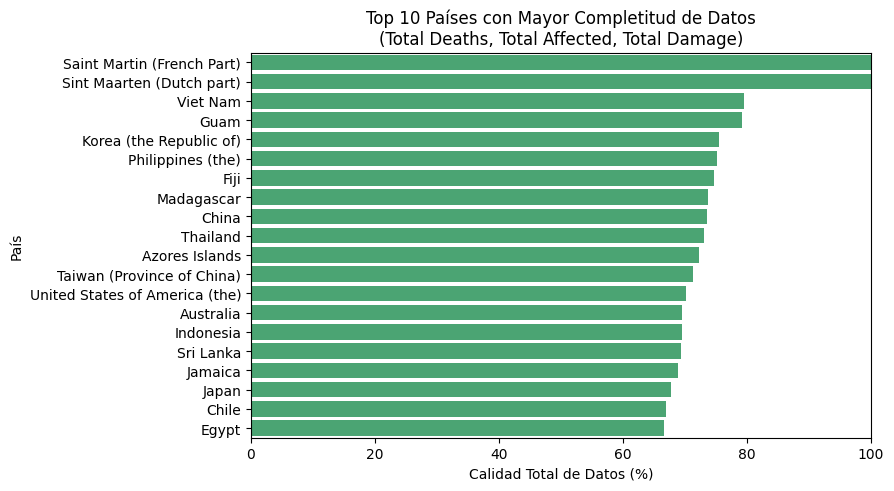

In [ ]:

# Seleccionamos los 10 países con mejor calidad total
top_paises = completo_por_pais.head(20).reset_index()

# Creamos la gráfica
plt.figure(figsize=(8, 5))
sns.barplot(data=top_paises, y='Country', x='Calidad Total (%)', color='mediumseagreen')
plt.xlabel('Calidad Total de Datos (%)')
plt.ylabel('País')
plt.title('Top 10 Países con Mayor Completitud de Datos\n(Total Deaths, Total Affected, Total Damage)')
plt.xlim(0, 100);



🎯 ¿Qué muestra esta gráfica?

El porcentaje medio de calidad del dato, combinado de las tres variables: muertos, afectados y daños.
Muy visual para ponerlo directamente en el dashboard de contexto o en el storytelling.

# Identificamos los países con los datos menos completos y con más nulos de las variables "muertos, afectados y daños"

In [ ]:
# Ordenamos de menor a mayor calidad total y seleccionamos los 20 primeros (peores)
bottom_paises = completo_por_pais.sort_values(by='Calidad Total (%)', ascending=True).head(20)

# Mostramos la tabla con los países y sus porcentajes
bottom_paises


,has_deaths,has_affected,has_damage,Total Eventos,Calidad Total (%)
Country,,,,,
Isle of Man,0.00,0.00,0.00,1,0.00
Germany Dem Rep,0.00,0.00,0.00,2,0.00
Czechoslovakia,22.22,11.11,22.22,9,18.52
Palau,0.00,75.00,0.00,4,25.00
Luxembourg,12.50,12.50,50.00,8,25.00
Tuvalu,11.11,66.67,0.00,9,25.93
Cook Islands (the),27.27,45.45,9.09,11,27.27
Guinea-Bissau,29.41,52.94,0.00,17,27.45
Tokelau,0.00,50.00,33.33,6,27.78


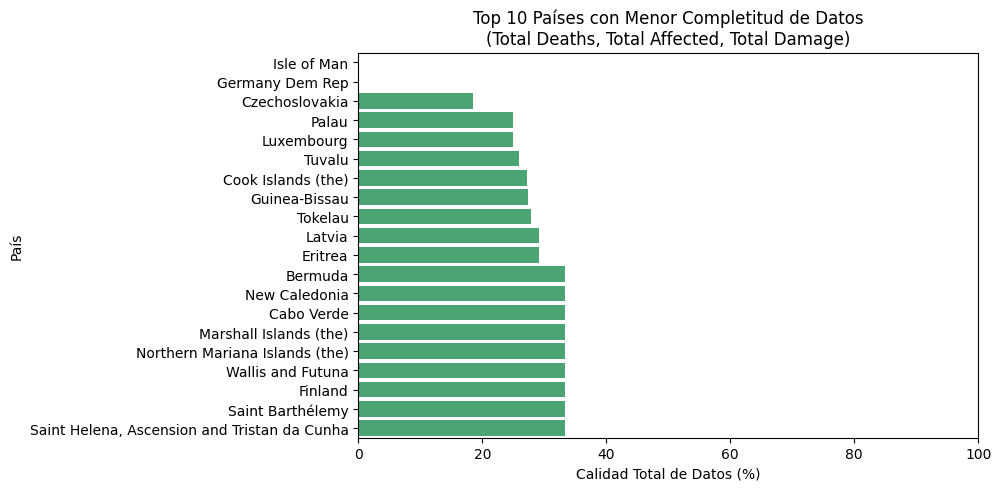

In [ ]:


# Seleccionamos los 20 países con peor calidad de datos:

# Crear la gráfica
plt.figure(figsize=(8, 5))
sns.barplot(data=bottom_paises, y='Country', x='Calidad Total (%)', color='mediumseagreen')
plt.xlabel('Calidad Total de Datos (%)')
plt.ylabel('País')
plt.title('Top 10 Países con Menor Completitud de Datos\n(Total Deaths, Total Affected, Total Damage)')
plt.xlim(0, 100);



# Calculo de desastres que han ocurrido en los paises con mejor calidad de datos:

In [72]:
# Ordenamos por calidad y cogemos los 20 mejores
top_paises = completo_por_pais.sort_values(by='Calidad Total (%)', ascending=False).head(20).index.tolist()


In [73]:
# Filtramos el DataFrame por los países con mejor calidad de datos
eventos_top_paises = df[df['Country'].isin(top_paises)]

# Contamos el total de desastres (filas) en esos países
numero_eventos_top_paises = eventos_top_paises.shape[0]

print(f"Total de desastres en los países con mejor calidad de datos: {numero_eventos_top_paises}")


Total de desastres en los países con mejor calidad de datos: 2576


In [74]:
# Número de eventos por cada uno de los países top
eventos_por_pais = eventos_top_paises['Country'].value_counts()
print(eventos_por_pais)


Country
United States of America (the)    405
China                             385
Indonesia                         274
Philippines (the)                 271
Japan                             258
Australia                         152
Viet Nam                          138
Thailand                          110
Chile                             106
Korea (the Republic of)           102
Sri Lanka                          86
Taiwan (Province of China)         85
Madagascar                         62
Fiji                               50
Jamaica                            44
Egypt                              32
Guam                                8
Azores Islands                      6
Saint Martin (French Part)          1
Sint Maarten (Dutch part)           1
Name: count, dtype: int64


Con esta información sabemos cuántas catástrofes hay en los países que mejor reportan los datos. En Power BI, podemos visualizarlo o cruzarlo con algún otro dato como tipo de daños o muertes.